# Robot-Run Cafe Market Research

<b> Project Description</b>

You’ve decided to open a small robot-run cafe in Los Angeles. The project is promising but expensive, so you and your partners decide to try to attract investors. They’re interested in the current market conditions—will you be able to maintain your success when the novelty of robot waiters wears off?
You’re an analytics guru, so your partners have asked you to prepare some market research. You have open-source data on restaurants in LA.

<b>Data description<b>

rest_data table:
    
object_name — establishment name

chain — chain establishment (TRUE/FALSE) 

object_type — establishment type 

address — address

number — number of seats

# TABLE OF CONTENTS:

1. [Download the data and prepare it for analysis](#start)
    * [Processing missing values](#null)
    * [Processing duplicate data](#duplicates)
    * [Renaming columns](#duplicates)
    
    
2. [Data analysis](#preprocessing)
    * [Proportions of the various types of establishments](#null)
    * [Proportions of chain and nonchain establishments](#duplicates)
    * [Which type of establishment is typically a chain?](#duplicates)
    * [What characterizes chains: many establishments with a small number of seats or a few establishments with a lot of seats?](#duplicates)
    * [Average number of seats for each type of restaurant](#duplicates)
    * [Top ten streets by number of restaurants](#duplicates)
    * [Number of streets that only have one restaurant](#duplicates)
    * [The distribution of the number of seats for streets with a lot of restaurants](#duplicates)
    

3.  [Overall conclusion and recommendations on restaurant type and number of seats](#duplicates)

# 1. Download the data and prepare it for analysis

Download the data on restaurants in LA. Make sure that the data type for each column is correct and that there are no missing values or duplicates. Process them if necessary.

In [1]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
#load datasets
try:
    data = pd.read_csv('/datasets/rest_data_us.csv')
    
except:
    data = pd.read_csv('rest_data_us.csv')

In [3]:
#preview of the dataset
data.head()

,id,object_name,address,chain,object_type,number
0,11786,HABITAT COFFEE SHOP,3708 N EAGLE ROCK BLVD,False,Cafe,26
1,11787,REILLY'S,100 WORLD WAY # 120,False,Restaurant,9
2,11788,STREET CHURROS,6801 HOLLYWOOD BLVD # 253,False,Fast Food,20
3,11789,TRINITI ECHO PARK,1814 W SUNSET BLVD,False,Restaurant,22
4,11790,POLLEN,2100 ECHO PARK AVE,False,Restaurant,20


In [4]:
#general dataset info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9651 entries, 0 to 9650
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           9651 non-null   int64 
 1   object_name  9651 non-null   object
 2   address      9651 non-null   object
 3   chain        9648 non-null   object
 4   object_type  9651 non-null   object
 5   number       9651 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 452.5+ KB


In [5]:
data.describe()

,id,number
count,9651.000000,9651.000000
mean,16611.000000,43.695161
std,2786.148058,47.622874
min,11786.000000,1.000000
25%,14198.500000,14.000000
50%,16611.000000,27.000000
75%,19023.500000,46.000000
max,21436.000000,229.000000


In [6]:
#look for duplicates
data.duplicated().sum()

0

In [7]:
#look for missing values
data.isnull().sum()

id             0
object_name    0
address        0
chain          3
object_type    0
number         0
dtype: int64

Looks like there are no duplicates, but there are 3 rows of missing values. Since it's not that many, we'll just filter them out.

In [8]:
#filtering out null values
data = data[data['chain'].notna()]

In [9]:
#double checking for null values
data.isnull().sum()

id             0
object_name    0
address        0
chain          0
object_type    0
number         0
dtype: int64

In [10]:
#renaming columns
data = data.rename(columns = {'object_name':'name','object_type':'type', 'number':'seats'})

In [11]:
#double checking general info
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9648 entries, 0 to 9650
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id       9648 non-null   int64 
 1   name     9648 non-null   object
 2   address  9648 non-null   object
 3   chain    9648 non-null   object
 4   type     9648 non-null   object
 5   seats    9648 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 527.6+ KB


In [35]:
data

,id,name,address,chain,type,seats,clean_address_full
0,11786,HABITAT COFFEE SHOP,3708 N EAGLE ROCK BLVD,False,Cafe,26,N EAGLE ROCK BLVD
1,11787,REILLY'S,100 WORLD WAY # 120,False,Restaurant,9,WORLD WAY #
2,11788,STREET CHURROS,6801 HOLLYWOOD BLVD # 253,False,Fast Food,20,HOLLYWOOD BLVD #
3,11789,TRINITI ECHO PARK,1814 W SUNSET BLVD,False,Restaurant,22,W SUNSET BLVD
4,11790,POLLEN,2100 ECHO PARK AVE,False,Restaurant,20,ECHO PARK AVE
...,...,...,...,...,...,...,...
9646,21432,HALL OF JUSTICE,217 W TEMPLE AVE,False,Restaurant,122,W TEMPLE AVE
9647,21433,FIN-MELROSE,5750 MELROSE AVE,False,Restaurant,93,MELROSE AVE
9648,21434,JUICY WINGZ,6741 HOLLYWOOD BLVD,True,Fast Food,15,HOLLYWOOD BLVD
9649,21435,MEDIDATE COFFEE,548 S SPRING ST STE 100,False,Cafe,6,S SPRING ST


Now it looks like our dataset is ready for analysis

# 2. Data analysis

* Investigate the proportions of the various types of establishments. Plot a graph.

* Investigate the proportions of chain and nonchain establishments. Plot a graph.

* Which type of establishment is typically a chain?

* What characterizes chains: many establishments with a small number of seats or a few establishments with a lot of seats?

* Determine the average number of seats for each type of restaurant. On average, which type of restaurant has the greatest number of seats? Plot graphs.

* Put the data on street names from the address column in a separate column.

* Plot a graph of the top ten streets by number of restaurants. 

* Find the number of streets that only have one restaurant.

* For streets with a lot of restaurants, look at the distribution of the number of seats. What trends can you see?

Draw an overall conclusion and provide recommendations on restaurant type and number of seats. Comment on the possibility of developing a chain.

<b>Investigate the proportions of the various types of establishments. Plot a graph</b>

In [12]:
#calculating number of each type of establishment
type_pie = data['type'].value_counts()
type_pie

Restaurant    7253
Fast Food     1066
Cafe           435
Pizza          319
Bar            292
Bakery         283
Name: type, dtype: int64

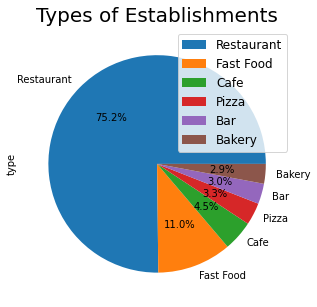

In [13]:
#plotting a pie chart to show proportions of each type of establishment
type_pie.plot.pie(y='type', figsize=(10, 5),autopct='%1.1f%%')
plt.title('Types of Establishments', fontsize= 20)
plt.legend(fontsize= 12)
plt.show()

Here we can see that restaurants make up the majority of establishments at 75.2%. Fast Food establishments come in second at 11%.

<b>Investigate the proportions of chain and nonchain establishments. Plot a graph</b>

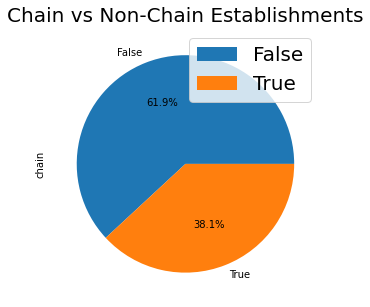

In [14]:
#plotting the proportions of chain and nonchain establishents
chain_graph = data['chain'].value_counts()
#chain_graph.plot(kind= 'bar', figsize= (14, 6))
#plt.show()

chain_graph.plot.pie(figsize=(10, 5),autopct='%1.1f%%')
plt.title('Chain vs Non-Chain Establishments', fontsize= 20)
plt.legend(fontsize= 20)
plt.show()

Non-chain establishments make up the majority at 61.9%. 

<b>Which type of establishment is typically a chain?</b>

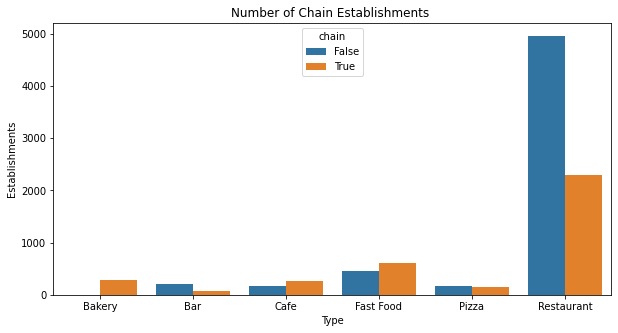

In [15]:
#plotting number of chain and non-chain establishments by type
fig, ax = plt.subplots(figsize=(10, 5))
type_chain_graph = data.groupby(['type', 'chain'])['id'].count().reset_index()
ax = sns.barplot(x='type', y='id', hue='chain', data=type_chain_graph)
ax.set_title('Number of Chain Establishments ')
ax.set_xlabel('Type')
ax.set_ylabel('Establishments')
plt.show()

Most chain establishments seem to be restaurants. However, non-chain restaurants make up almost double that of chain restaurants.

<b>What characterizes chains: many establishments with a small number of seats or a few establishments with a lot of seats?</b>

In [16]:
#filtering only chain establishments
chain_only= data[data['chain']== True]
chain_only.head()

,id,name,address,chain,type,seats
8,11794,ABC DONUTS,3027 N SAN FERNANDO RD UNIT 103,True,Fast Food,1
10,11796,EL POLLO LOCO,5319 W SUNSET BLVD,True,Restaurant,38
11,11797,POONG NYUN BAKERY,928 S WESTERN AVE STE 109,True,Bakery,17
12,11798,EMC RESTAURANT GROUP LLC,3500 W 6TH ST STE 101,True,Restaurant,133
14,11800,CUSCATLECA BAKERY,2501 W SUNSET BLVD #A,True,Bakery,26


In [17]:
#calculating chain establishments by type and number of seats
seats_chain_only= chain_only.groupby('type')['seats'].sum().sort_values(ascending= False)
seats_chain_only

type
Restaurant    102810
Fast Food      23044
Cafe            6894
Bakery          6162
Pizza           3906
Bar             3100
Name: seats, dtype: int64

As expected, we can see that restaurants have the most number of seats compared to the other types of establishments. Fast Food establishments come in second. 

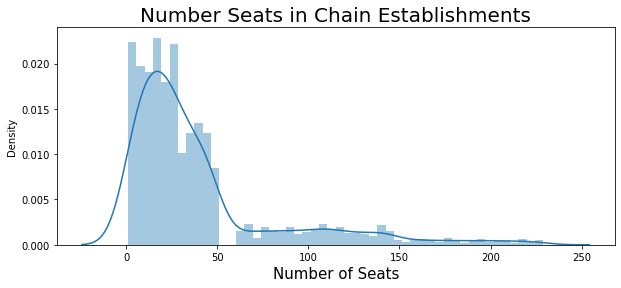

In [18]:
#plotting chain establishments by type and number of seats
plt.subplots(figsize=(10, 4))
sns.distplot(chain_only['seats'])
plt.title('Number Seats in Chain Establishments', fontsize= 20)
plt.xlabel('Number of Seats', fontsize= 15)
plt.show()

Here we can see that the majority of chain establishments have between 0 and 50 seats. Other chain establishments have more chairs, but there are fewer of these establishments.

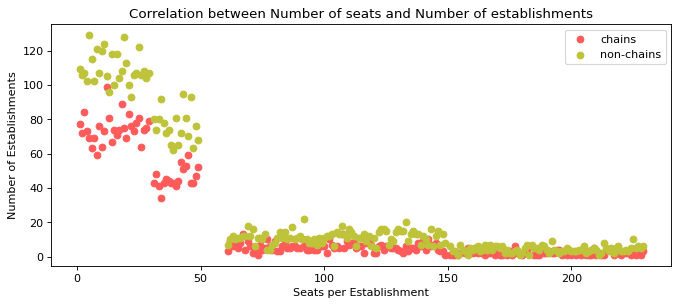

In [19]:
# filtering chain only establishments
chainData = data[data['chain'] == True]
#pivot table calculating number of unique ids and number of seats
chainData = pd.pivot_table(chainData, index=['seats'], values=['id'], aggfunc=['count']).reset_index()
#renaming columns
chainData.columns = ['seats','count']
#sorting the count column in descending order
chainData = chainData.sort_values(by='count', ascending=False)

# filtering chain only establishments
nonChainData = data[data['chain'] == False]
#pivot table calculating number of unique ids and number of seats
nonChainData = pd.pivot_table(nonChainData, index=['seats'], values=['id'], aggfunc=['count']).reset_index()
#renaming columns
nonChainData.columns = ['seats','count']
#sorting the count column in descending order
nonChainData = nonChainData.sort_values(by='count', ascending=False)

# plotting a scatter plot
plt.figure(figsize=(10, 4), dpi=80)
plt.scatter(chainData['seats'], chainData['count'], color='#ff5b5b', label='chains')
plt.scatter(nonChainData['seats'], nonChainData['count'], color='#bec339', label='non-chains')
plt.xlabel('Seats per Establishment')
plt.ylabel('Number of Establishments')
plt.legend()
plt.title('Correlation between Number of seats and Number of establishments')
plt.show()

Similar to our distribution plot above, the scatter plot shows that more restaurants have between 0-50 seats, while fewer restaurants have more seats. This also shows that there are many more non-chain restaurants. 

<b>Determine the average number of seats for each type of restaurant. On average, which type of restaurant has the greatest number of seats? Plot graphs</b>

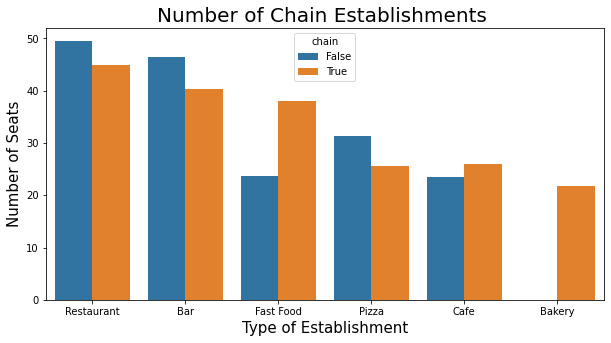

In [20]:
#plotting nunmber of seats by chain and non-chain establishments
fig, ax = plt.subplots(figsize=(10, 5))
type_chain_graph = data.groupby(['type', 'chain'])['seats'].mean().reset_index().sort_values(['seats'], ascending= False)
ax = sns.barplot(x='type', y='seats', hue='chain', data=type_chain_graph)
ax.set_title('Number of Chain Establishments ', fontsize= 20)
ax.set_xlabel('Type of Establishment', fontsize= 15)
ax.set_ylabel('Number of Seats', fontsize= 15)

plt.show()

Generally establishments with the most number of seats are restaurants, and bars coming in second place. This includes both chain and non-chain establishments. 

<b>Put the data on street names from the address column in a separate column</b>

In [21]:
#creating a function to remove number from the beginning of the address and at the end of the address
def string_removal(address):
    address = address.lstrip('0123456789.- ').rstrip('#0123456789#')

    return address

In [22]:
#applying the function to the 'address' column
clean_address = data['address'].apply(lambda x: string_removal(x))

In [23]:
#creating a function to remove the words 'STE' and 'UNIT' and any '#' that comes after
def unit_ste_remover(address):
    string = ""
    # split string by word using space
    for word in address.split():
        if word !="STE" and word !="UNIT":
            string = string + ' ' +word
        else :
            break
    return string

In [24]:
#applying the function to 'clean_address'
clean_address_full = clean_address.apply(lambda x: unit_ste_remover(x))

In [25]:
#creating a new column called 'clean_address_full'
data['clean_address_full'] = clean_address_full

In [26]:
len(data['name'].unique())

8669

In [27]:
#data['address_update'] = data['address'].apply(lambda x: x.split(' ')[-1])
#data['address_update'] = data['name'].apply(lambda x: x.split(' ')[:3])

In [28]:
#checking to see if new column was successful
data.head()

,id,name,address,chain,type,seats,clean_address_full
0,11786,HABITAT COFFEE SHOP,3708 N EAGLE ROCK BLVD,False,Cafe,26,N EAGLE ROCK BLVD
1,11787,REILLY'S,100 WORLD WAY # 120,False,Restaurant,9,WORLD WAY #
2,11788,STREET CHURROS,6801 HOLLYWOOD BLVD # 253,False,Fast Food,20,HOLLYWOOD BLVD #
3,11789,TRINITI ECHO PARK,1814 W SUNSET BLVD,False,Restaurant,22,W SUNSET BLVD
4,11790,POLLEN,2100 ECHO PARK AVE,False,Restaurant,20,ECHO PARK AVE


Now we have a column in the dataset that only shows the street names

<b>Plot a graph of the top ten streets by number of restaurants</b>

In [29]:
#sorting the number of restaurants by street name
top_streets= data.groupby('clean_address_full')['address'].count().sort_values(ascending= False).reset_index()
#renaming the columns
top_10_streets = top_streets.rename(columns= {'clean_address_full':'street', 'address':'number_of_restaurants'})
top_10_streets= top_10_streets.head(10)
top_10_streets

,street,number_of_restaurants
0,W SUNSET BLVD,336
1,W PICO BLVD,316
2,WILSHIRE BLVD,307
3,HOLLYWOOD BLVD,203
4,S WESTERN AVE,201
5,W OLYMPIC BLVD,198
6,SANTA MONICA BLVD,195
7,W 3RD ST,192
8,S FIGUEROA ST,191
9,S VERMONT AVE,185


Now we can see the top 10 streets with the most number of establishments. 

In [30]:
#top_streets= data.groupby('name')['address'].count().sort_values(ascending= False).reset_index()
#top_streets = top_streets.rename(columns= {'name':'street', 'address':'number_of_restaurants'})
#top_streets= top_streets.head(10)
#top_streets

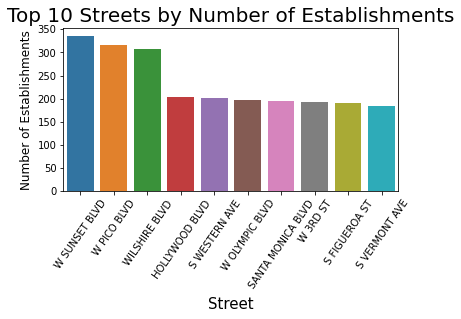

In [31]:
#plotting top 10 streets by number of establishments
fig, ax = plt.subplots(figsize=(6, 3))
sns.barplot(x= 'street', y= 'number_of_restaurants', data=top_10_streets)
plt.xticks(rotation=55)
plt.title('Top 10 Streets by Number of Establishments', fontsize= 20)
plt.xlabel('Street', fontsize= 15)
plt.ylabel('Number of Establishments', fontsize= 12)
plt.show()

Here we can see that the top 3 streets with the most restaurants are Sunset Blvd, Pico Blvd, and Wilshire Blvd respectively.

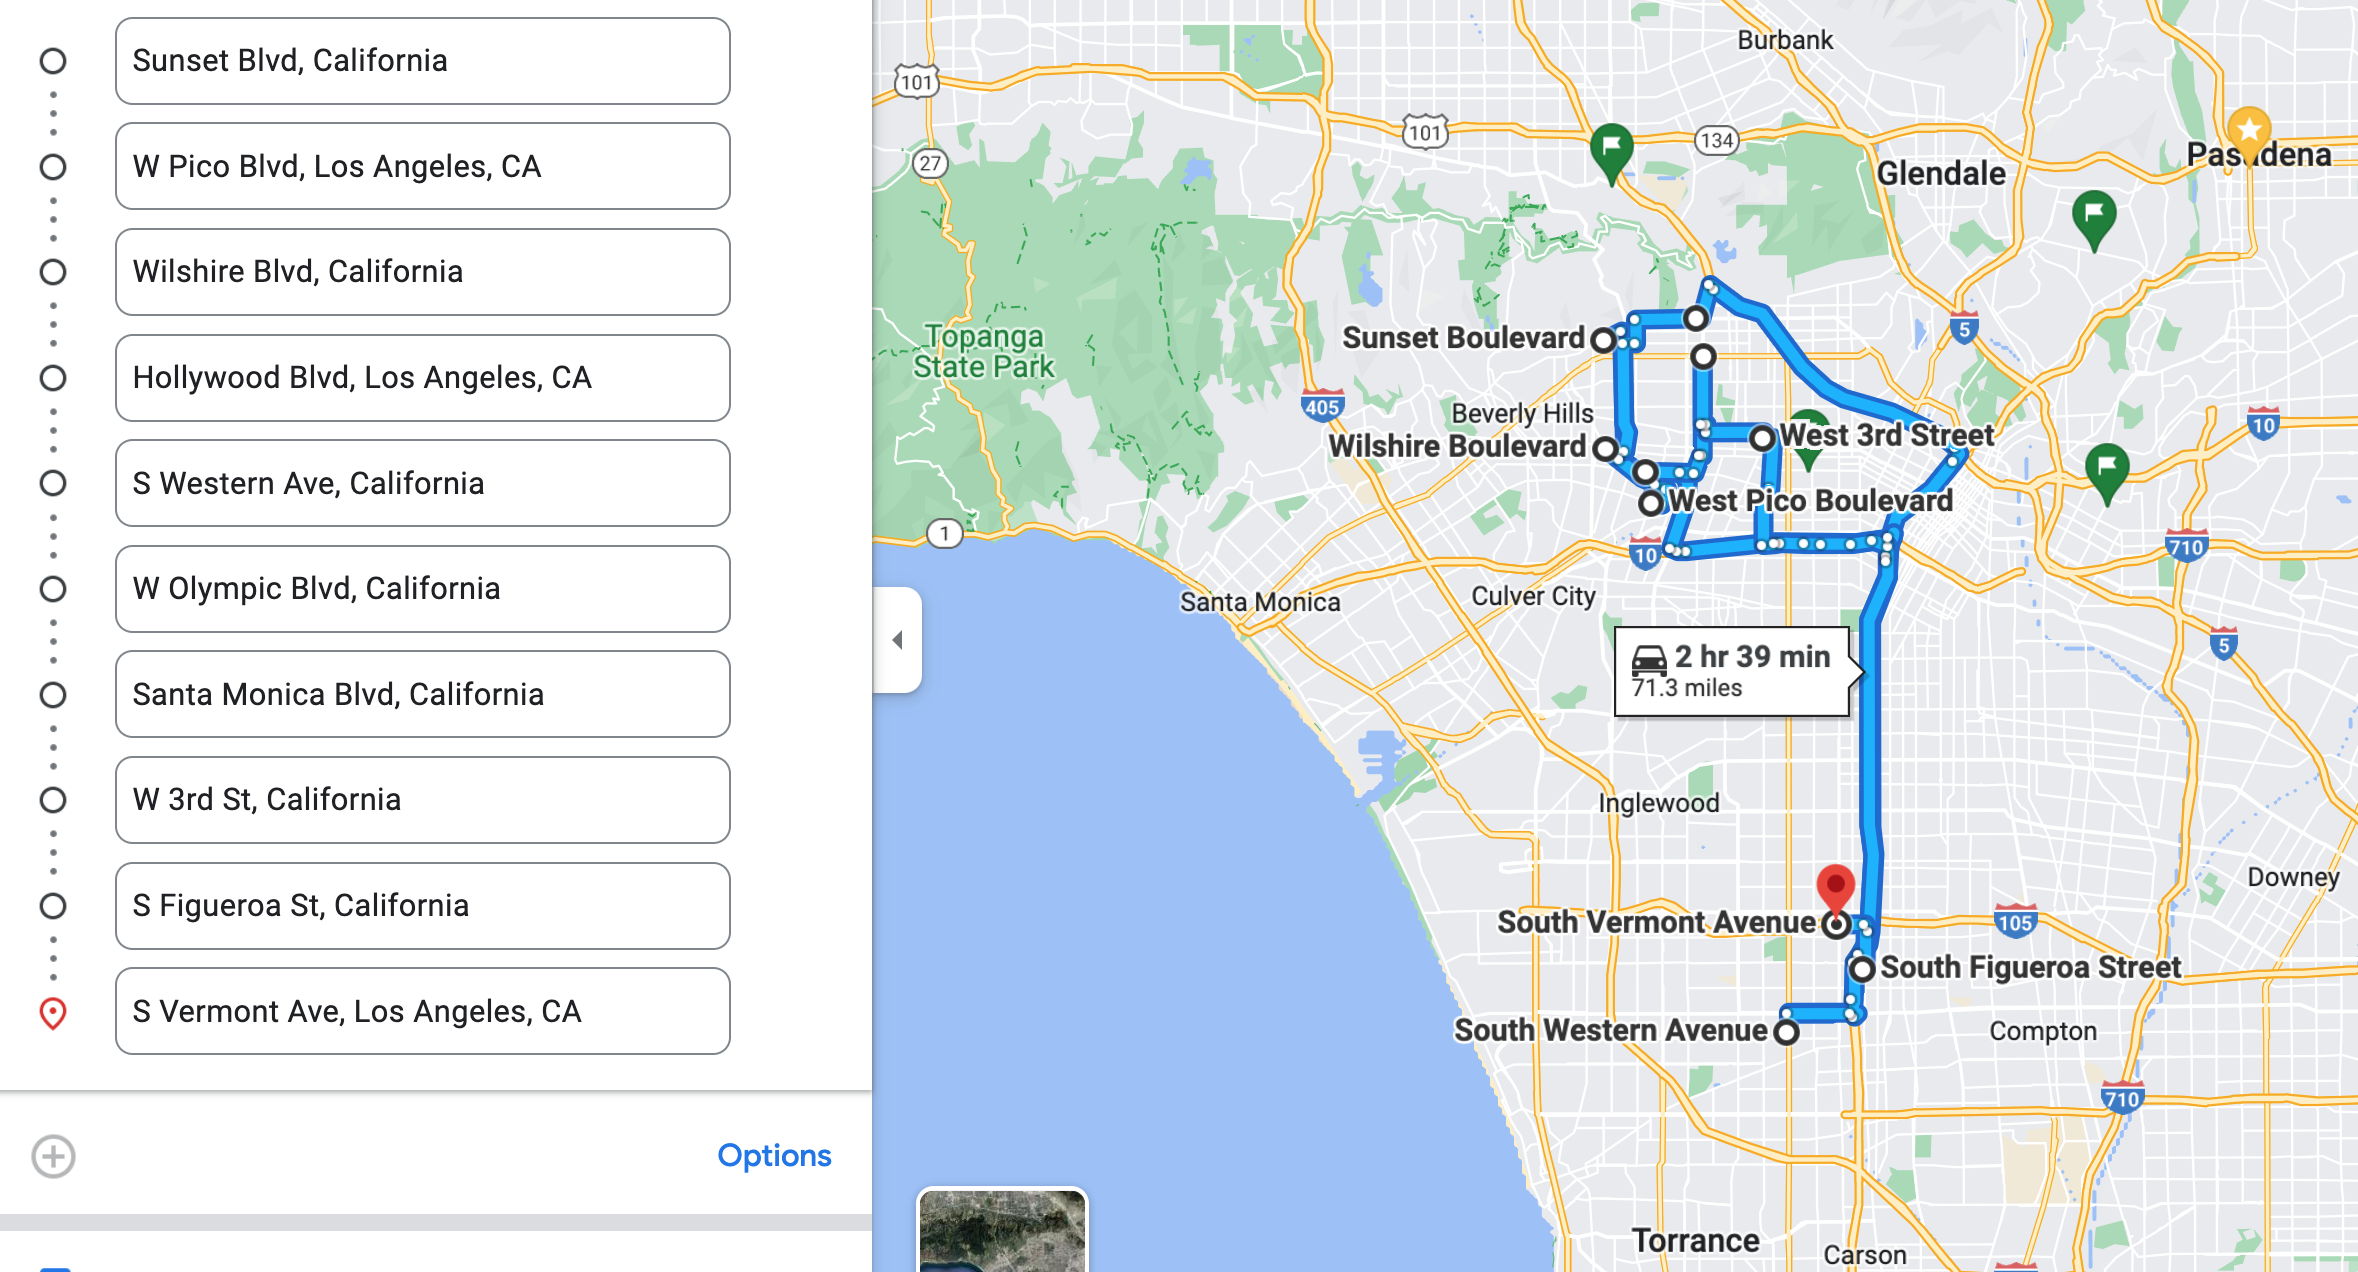

Based on the above map, from east to west, we can see that from streets with the most restaurants are between Beverly Hills and Downtown Los Angeles. And from North to South between the Hollywood Hills, and South Central Los Angeles. 

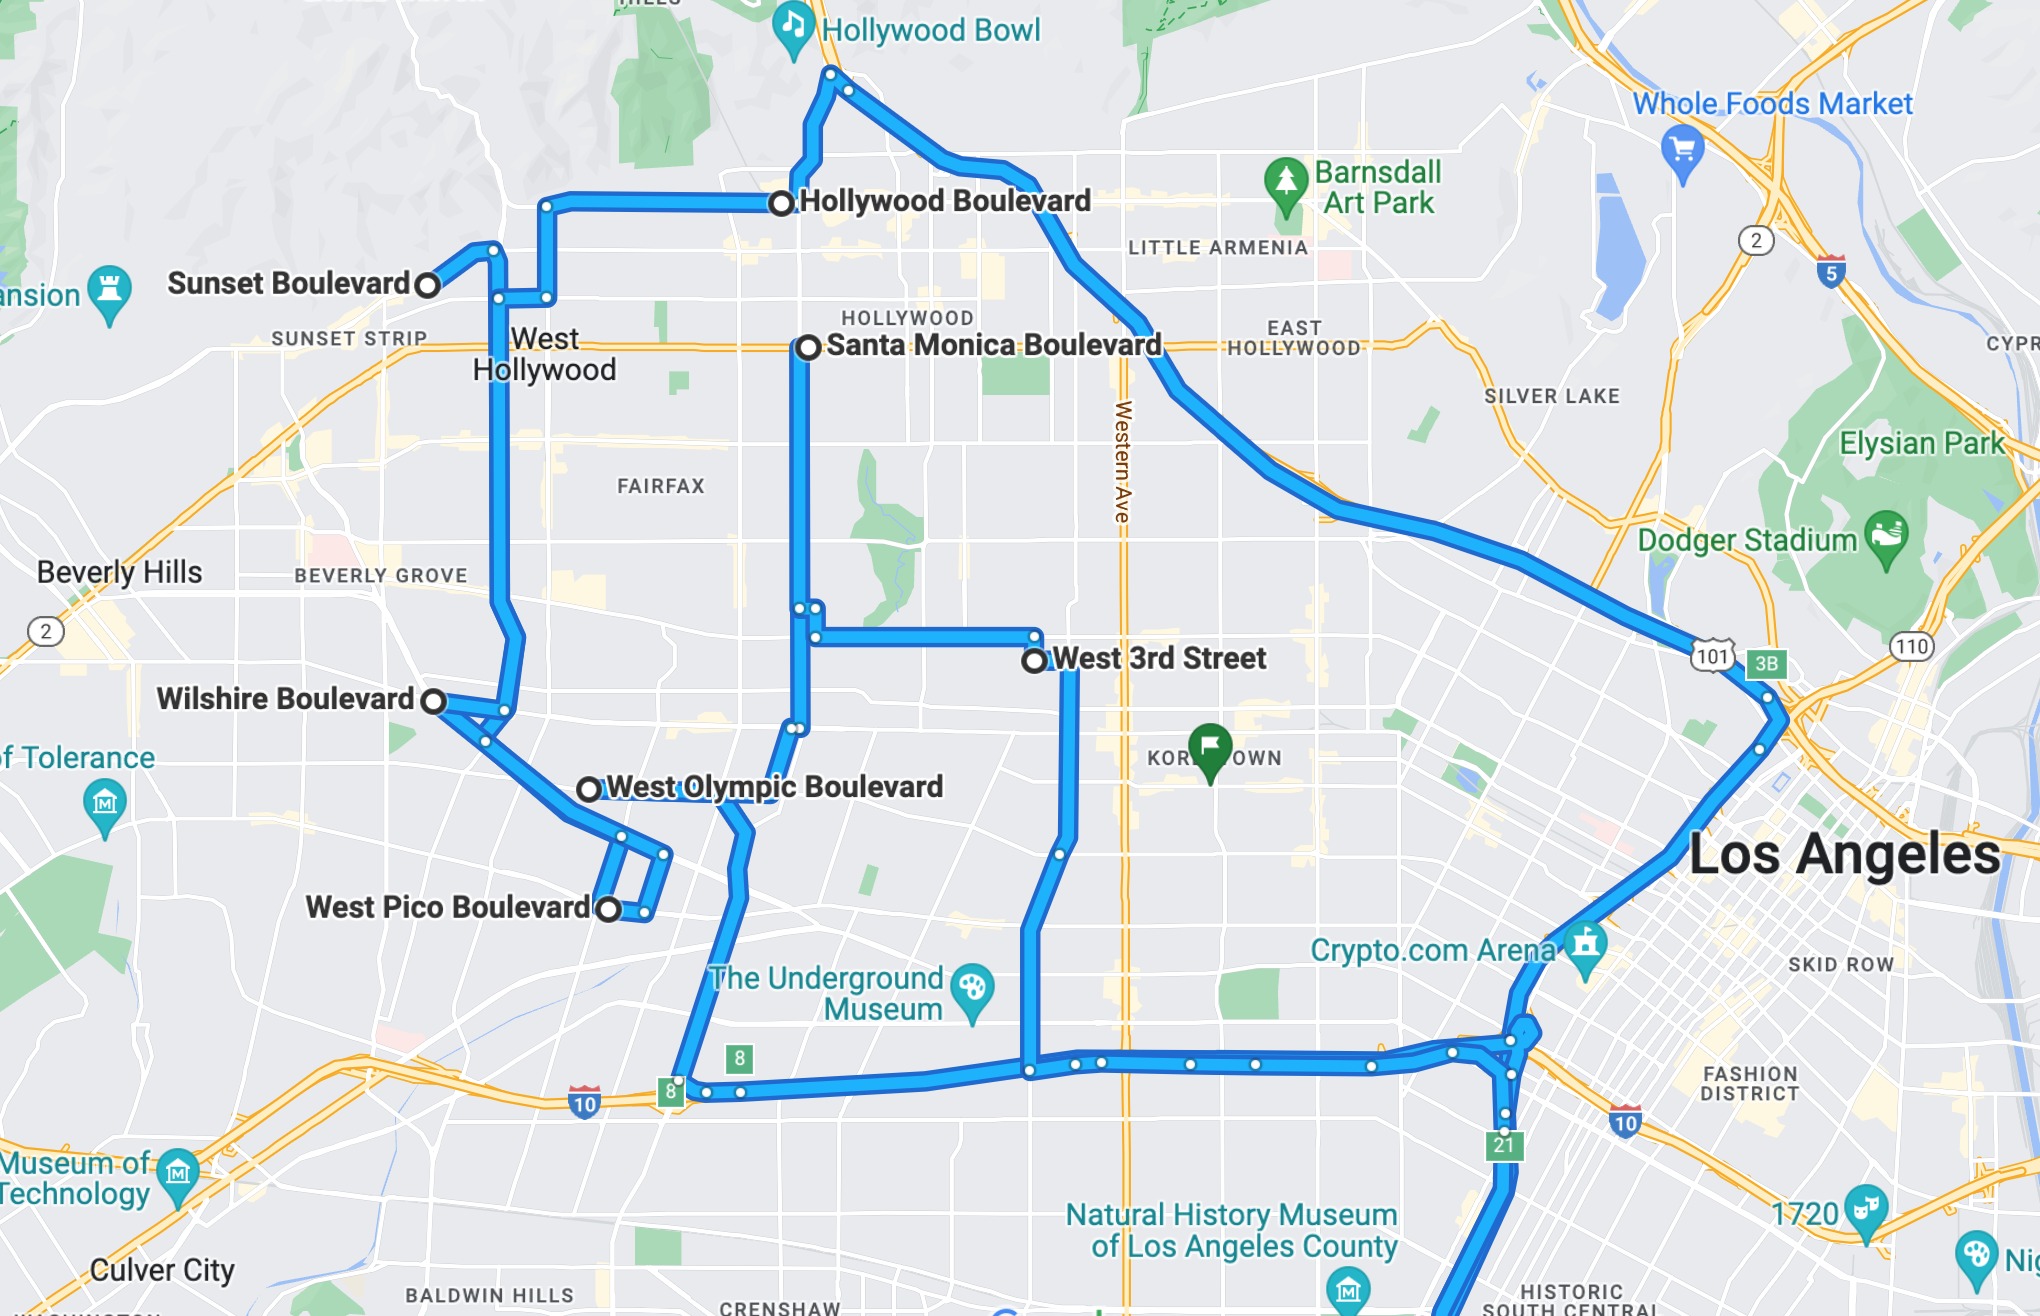

The most popular areas seem to be Hollywood, Fairfax, Koreatown, and the West Los Angeles areas. 

<b>Find the number of streets that only have one restaurant</b>

In [32]:
print(f'There are {len(top_streets.query("address== 1"))} streets with only one restaurant')

There are 922 streets with only one restaurant


<b>For streets with a lot of restaurants, look at the distribution of the number of seats. What trends can you see?</b>

In [33]:
#filtering only streets with the most restaurants
street_lots_rest= data[data['clean_address_full'].isin(top_streets['clean_address_full'])]
street_lots_rest

,id,name,address,chain,type,seats,clean_address_full
0,11786,HABITAT COFFEE SHOP,3708 N EAGLE ROCK BLVD,False,Cafe,26,N EAGLE ROCK BLVD
1,11787,REILLY'S,100 WORLD WAY # 120,False,Restaurant,9,WORLD WAY #
2,11788,STREET CHURROS,6801 HOLLYWOOD BLVD # 253,False,Fast Food,20,HOLLYWOOD BLVD #
3,11789,TRINITI ECHO PARK,1814 W SUNSET BLVD,False,Restaurant,22,W SUNSET BLVD
4,11790,POLLEN,2100 ECHO PARK AVE,False,Restaurant,20,ECHO PARK AVE
...,...,...,...,...,...,...,...
9646,21432,HALL OF JUSTICE,217 W TEMPLE AVE,False,Restaurant,122,W TEMPLE AVE
9647,21433,FIN-MELROSE,5750 MELROSE AVE,False,Restaurant,93,MELROSE AVE
9648,21434,JUICY WINGZ,6741 HOLLYWOOD BLVD,True,Fast Food,15,HOLLYWOOD BLVD
9649,21435,MEDIDATE COFFEE,548 S SPRING ST STE 100,False,Cafe,6,S SPRING ST


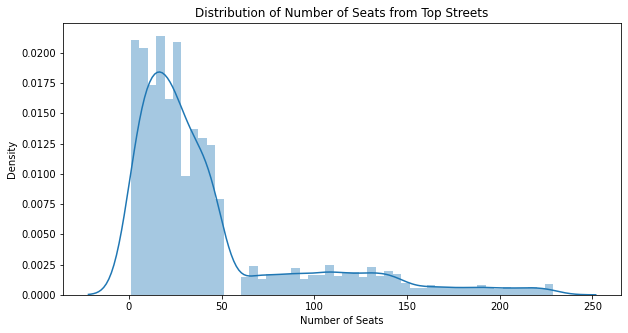

In [34]:
#plotting a distribution plot to show number of seats 
fig, ax = plt.subplots(figsize=(10, 5))
sns.distplot(street_lots_rest['seats'])
ax.set_title('Distribution of Number of Seats from Top Streets')
ax.set_xlabel('Number of Seats')
plt.show()

Similar to our other distribution graph, we can see that most establishments have between 0-50 seats. While establishments with more seats are fewer. 

# 3. OVERALL CONCLUSION & RECOMMENDATIONS

<b>Draw an overall conclusion and provide recommendations on restaurant type and number of seats. Comment on the possibility of developing a chain</b>

<b> CONCLUSION:</b>

* Restaurants make up the majority of establishments at 75.2%. Fast Food establishments come in second at 11%.
* Non-chain establishments make up the majority at 61.9%
* Most chain establishments seem to be restaurants. However, non-chain restaurants make up almost double that of chain restaurants.
* Restaurants have the most number of seats compared to the other types of establishments.
* Here we can see that the majority of chain establishments have between 0 and 50 seats. Other chain establishments have more chairs, but there are fewer of these establishments.
* More establishments have between 0-50 seats, while fewer establishments have more seats. 
* Generally establishments with the most number of seats are restaurants, and bars coming in second place. This includes both chain and non-chain establishments. 
* Here we can see that the top 3 streets with the most restaurants are Sunset Blvd, Pico Blvd, and Wilshire Blvd respectively.
* Based on the above map, from east to west, we can see that from streets with the most restaurants are between Beverly Hills and Downtown Los Angeles. And from North to South between the Hollywood Hills, and South Central Los Angeles. 
* The most popular areas seem to be Hollywood, Fairfax, Koreatown, and the West Los Angeles areas. 
* There are 922 streets with only one restaurant

<b> RECOMMENDATIONS:</b>

My recommendation is to open the robot-run cafe or bakery in one of the top 10 most popular streets. There seems to be a very low number of cafe and bakeries, especially non-chain bakeries which make up about 61.9% of the market. Cafes and Bakeries sell very similar items, coffee and pastries. Since most of the popular establishments have between 0-50 chairs, the robot-run cafe can start small with fewer chairs. If sales start to grow, more chairs may be added. I also recommend opening the cafe or bakery in a popular tourist area like Hollywood or Fairfax. The novelty of a robot-run cafe could attract both tourists and locals since those are high foot traffic and popular areas.

Presentation: [LINK](https://drive.google.com/file/d/1KpDCZkJ_09WH_Jb_Yelz-SHXs5Wi3KDb/view?usp=sharing)